In [3]:
### standard sci-py libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot ### to read, convert, inspect ROOT TTrees
import matplotlib as mpl

from hipe4ml.model_handler import ModelHandler
from hipe4ml.tree_handler import TreeHandler
from hipe4ml import analysis_utils
from hipe4ml import plot_utils

import matplotlib.ticker as mtick # for 1e10 format on Axis
import pickle

In [201]:
# Loading the datasets

hdl_data = TreeHandler("/eos/user/h/hsharma/HyperLoop_Output_Run3/DATA_train_Lc_112997/LcData_df_161_233_new.root", "LcData")

# removing extra tails which are far from signal region

hdl_data.apply_preselections("fM > 2.2 and fM < 2.4", inplace=True)

# ---------------------------------------------------------------

# ---> Using Tight selection for data

tpcSigKa_min = -3
tpcSigKa_max = 3

pt_min = 0
pt_max = 10

## ---> Selections from Cut based analysis 
cpa_min=0.95
cpa_max=1.0

DL_min=0.02
DL_max=100


cutList=[
    f'fNSigTpcKa1 > {tpcSigKa_min}',
    f'fNSigTpcKa1 < {tpcSigKa_max}',
    f'fPt > {pt_min}',
    f'fPt < {pt_max}',
    f'fCpa > {cpa_min}',    
    f'fCpa < {cpa_max}',
    f'fDecayLength > {DL_min}',
    f'fDecayLength < {DL_max}'
]

allCuts = ' & '.join(cutList)
allCuts = f' {allCuts} '  # Add spaces around the string

# ---> Applying the same Tight selection criteira for data and MC

hdl_data.apply_preselections(allCuts, inplace=True)

print('Total Size of samples \nData = ',len(hdl_data))


# convering dataset into pandas
df_application = hdl_data.get_data_frame()

Total Size of samples 
Data =  1259791


Explained Variance Ratios: [0.14870362 0.10297732 0.09219878]


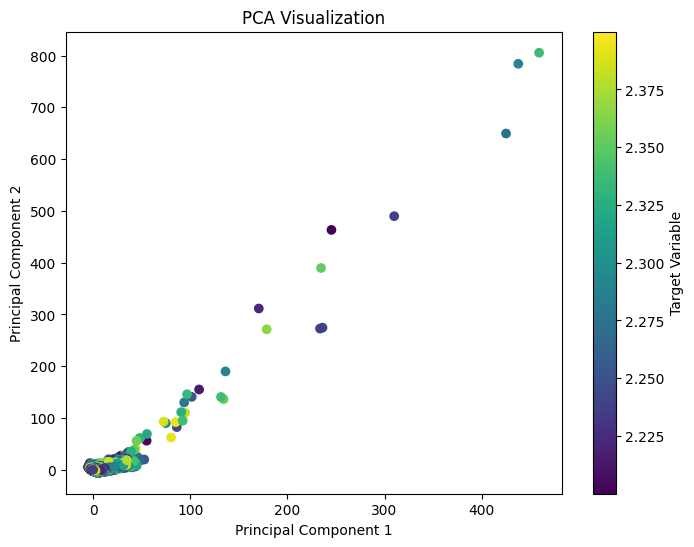

In [202]:
# Applying PCA to data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_application.drop('fM', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

n_components = 3  # Replace with the desired number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_application['fM'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Variable')
plt.show()


# Assuming X_pca contains the transformed data
n_selected_components = 10
selected_components = X_pca[:, :n_selected_components]  # Replace n_selected_components with the desired number

In [210]:
# from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=0, n_init="auto")
# X = df_application.values
# kmeans_model.fit(X)
kmeans_model.fit(X_pca)
cluster_labels = kmeans_model.labels_

<Axes: >

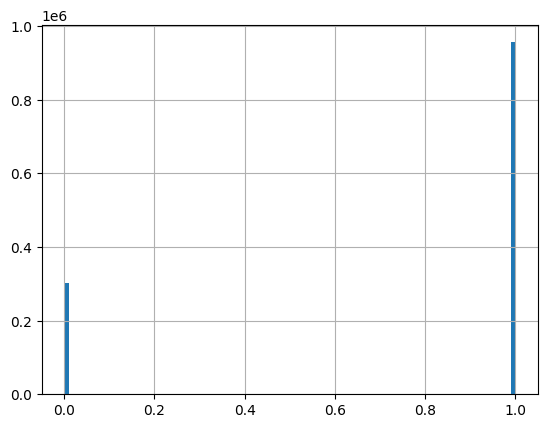

In [211]:
# Add cluster labels to the DataFrame
df_application['cluster'] = cluster_labels
df_application['cluster'].hist(bins=100)

In [213]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

df_0 = df_application.query('cluster == 0')
df_1 = df_application.query('cluster == 1')
df_2 = df_application.query('cluster == 2')


invalid value encountered in true_divide


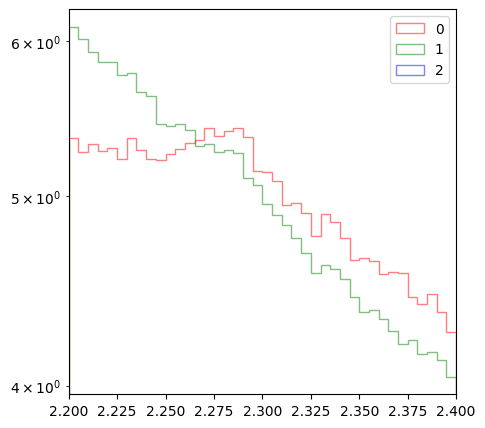

In [214]:
plt.figure(figsize=(5, 5))

histrange=(2.2,2.4)
var='fM'
plt.hist(df_0[var], bins=40, log=1, density=1, alpha=0.5, range=histrange ,label='0',color='r',histtype='step')  # Adjust the number of bins as needed
plt.hist(df_1[var], bins=40, log=1, density=1, alpha=0.5 , range=histrange, label='1',color='g',histtype='step')  # Adjust the number of bins as needed
plt.hist(df_2[var], bins=40, log=1, density=1, alpha=0.5 ,range=histrange, label='2',color='b',histtype='step')  # Adjust the number of bins as needed
plt.xlim(histrange)
plt.legend()
plt.show()

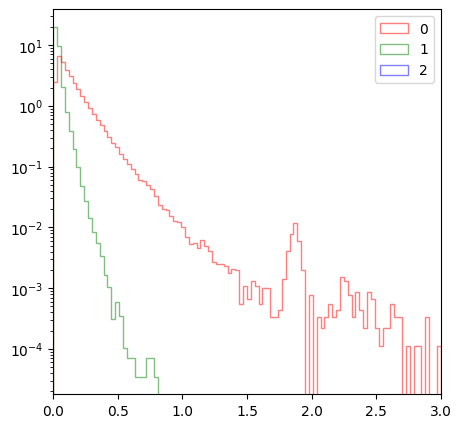

In [215]:
plt.figure(figsize=(5, 5))

histrange=(0,3)
var='fDecayLengthXY'
plt.hist(df_0[var], bins=100, log=1, density=1, alpha=0.5, range=histrange ,label='0',color='r',histtype='step')  # Adjust the number of bins as needed
plt.hist(df_1[var], bins=100, log=1, density=1, alpha=0.5 , range=histrange, label='1',color='g',histtype='step')  # Adjust the number of bins as needed
plt.hist(df_2[var], bins=100, log=1, density=1, alpha=0.5 ,range=histrange, label='2',color='b',histtype='step')  # Adjust the number of bins as needed
plt.xlim(histrange)
plt.legend()
plt.show()

In [150]:
df_application.columns


Index(['fM', 'fPt', 'fCpa', 'fCpaXY', 'fCt', 'fEta', 'fPhi', 'fDecayLength',
       'fDecayLengthXY', 'fDecayLengthNormalised', 'fDecayLengthXYNormalised',
       'fErrorDecayLength', 'fErrorDecayLengthXY', 'fXSecondaryVertex',
       'fYSecondaryVertex', 'fZSecondaryVertex', 'fImpactParameterNormalised0',
       'fImpactParameterNormalised1', 'fImpactParameterNormalised2',
       'fPtProng0', 'fPtProng1', 'fPtProng2', 'fImpactParameter0',
       'fImpactParameter1', 'fImpactParameter2', 'fErrorImpactParameter0',
       'fErrorImpactParameter1', 'fErrorImpactParameter2', 'fChi2PCA',
       'fRSecondaryVertex', 'fCandidateSelFlag', 'fNSigTpcPi0', 'fNSigTpcPi2',
       'fNSigTpcPr0', 'fNSigTpcPr2', 'fNSigTpcKa1', 'fNSigTofPi0',
       'fNSigTofPi2', 'fNSigTofPr0', 'fNSigTofPr2', 'fNSigTofKa1', 'cluster'],
      dtype='object')

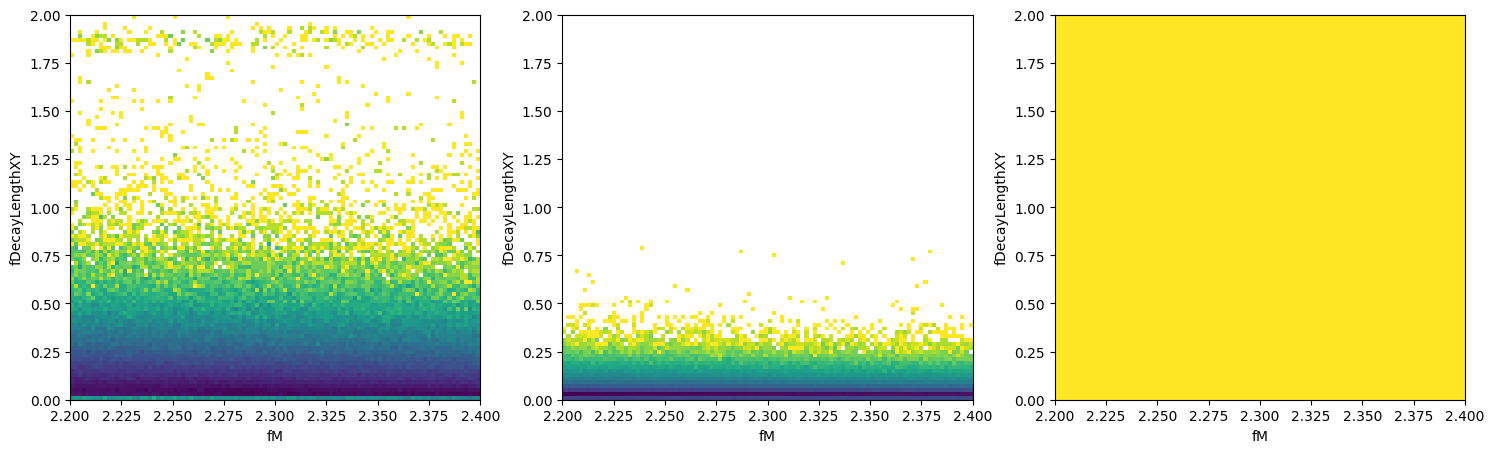

In [216]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_min=2.2
x_max=2.4
y_min=0
y_max=2


xVar='fM'
yVar='fDecayLengthXY'

# Create histograms with shared x-axis limits
for ax, df in zip(axes, [df_0, df_1, df_2]):
    h = ax.hist2d(df[xVar], df[yVar], range=[[x_min, x_max],[y_min, y_max]],norm=mpl.colors.LogNorm(), bins=100, cmap='viridis_r')
    ax.set_xlim(x_min,x_max)  # Set custom x-axis limits
    ax.set_ylabel(yVar)
    ax.set_xlabel(xVar)

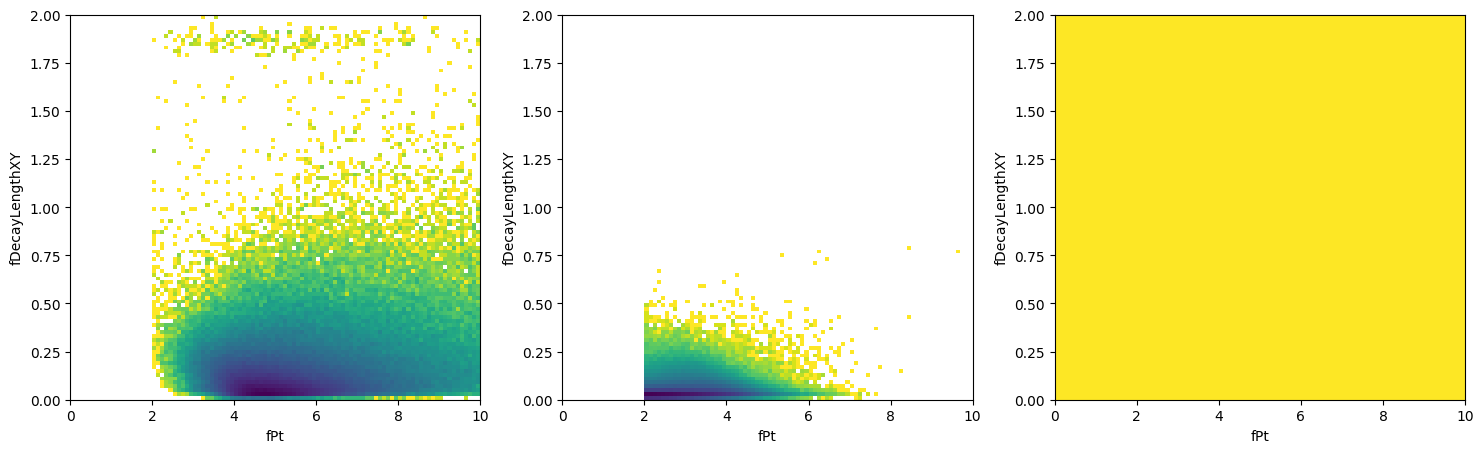

In [217]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_min=0
x_max=10
y_min=0
y_max=2


xVar='fPt'
yVar='fDecayLengthXY'

# Create histograms with shared x-axis limits
for ax, df in zip(axes, [df_0, df_1, df_2]):
    h = ax.hist2d(df[xVar], df[yVar], range=[[x_min, x_max],[y_min, y_max]],norm=mpl.colors.LogNorm(), bins=100, cmap='viridis_r')
    ax.set_xlim(x_min,x_max)  # Set custom x-axis limits
    ax.set_ylabel(yVar)
    ax.set_xlabel(xVar)

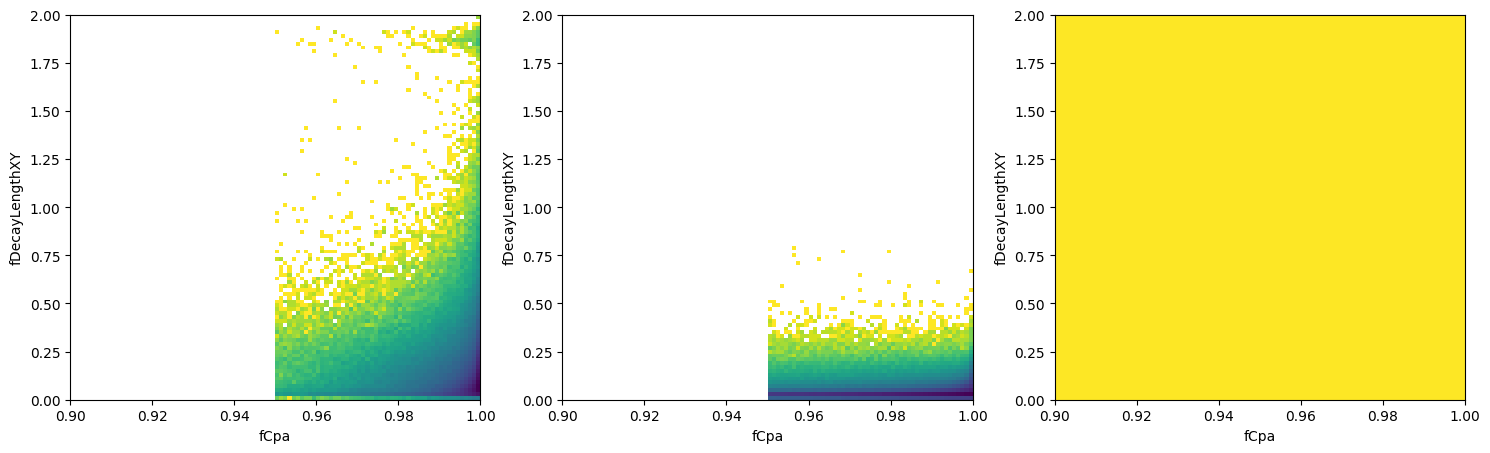

In [218]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_min=0.9
x_max=1
y_min=0
y_max=2


xVar='fCpa'
yVar='fDecayLengthXY'

# Create histograms with shared x-axis limits
for ax, df in zip(axes, [df_0, df_1, df_2]):
    h = ax.hist2d(df[xVar], df[yVar], range=[[x_min, x_max],[y_min, y_max]],norm=mpl.colors.LogNorm(), bins=100, cmap='viridis_r')
    ax.set_xlim(x_min,x_max)  # Set custom x-axis limits
    ax.set_ylabel(yVar)
    ax.set_xlabel(xVar)

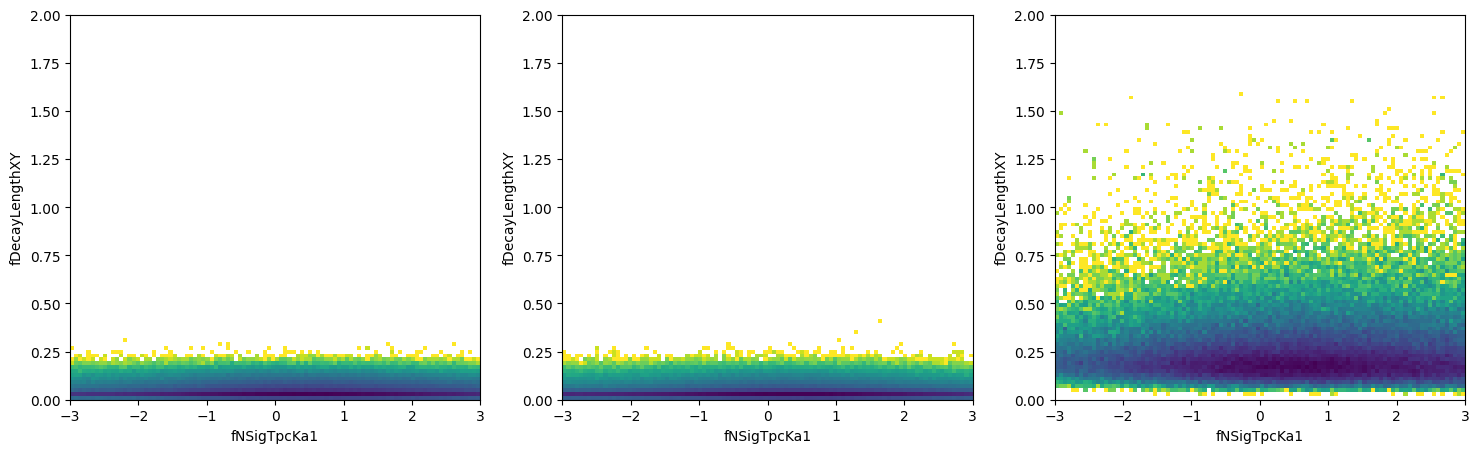

In [200]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_min=-3
x_max=3
y_min=0
y_max=2


xVar='fNSigTpcKa1'
yVar='fDecayLengthXY'

# Create histograms with shared x-axis limits
for ax, df in zip(axes, [df_0, df_1, df_2]):
    h = ax.hist2d(df[xVar], df[yVar], range=[[x_min, x_max],[y_min, y_max]],norm=mpl.colors.LogNorm(), bins=100, cmap='viridis_r')
    ax.set_xlim(x_min,x_max)  # Set custom x-axis limits
    ax.set_ylabel(yVar)
    ax.set_xlabel(xVar)

In [105]:
from scipy.optimize import curve_fit
from scipy import integrate
from matplotlib.offsetbox import AnchoredText

def fit_invmass(df, fit_range=[1.660, 1.685]):
    
    # histogram of the data
    minXicMass=2.2
    maxXicMass=2.4
    binWidth=0.005 # GeV/c^2 ~ 4 MeV/c^2
    binsInvMass=int((maxXicMass-minXicMass)/binWidth);

    print('=====================================')
    print('Bins of Inv Mass plot: ',binsInvMass)
    print('=====================================')

    counts, bins = np.histogram(df, bins=binsInvMass, range=fit_range)
    
    # define functions for fitting    
    def gaus_function(x, N, mu, sigma):
        return N * np.exp(-(x-mu)**2/(2*sigma**2))
    
    def pol2_function(x, a, b):
        return (a + x*b)
    
    def fit_function(x, a, b, N, mu, sigma):
        return pol2_function(x, a, b) + gaus_function(x, N, mu, sigma)
    
    # x axis ranges for plots
    x_point = 0.5 * (bins[1:] + bins[:-1])
    r = np.arange(fit_range[0], fit_range[1], 0.00001)
    
    # fit the invariant mass distribution with fit_function() pol2+gauss
    popt, pcov = curve_fit(fit_function, x_point, counts, p0 = [100, -1, 100, 2.28, 0.001])
    plt.figure(figsize=(8,8))
    # plot data
    plt.errorbar(x_point, counts, yerr=np.sqrt(counts), fmt='o', ecolor='k', color='k', elinewidth=1., label='Data')
    
    # plot pol2 and gauss obtained in the fit separately
    plt.plot(r, gaus_function(r, N=popt[2], mu=popt[3], sigma=popt[4]), label='Gaus', color='red')
    plt.plot(r, pol2_function(r, a=popt[0], b=popt[1]), label='pol2', color='green', linestyle='--')

    # plot the global fit
    plt.plot(r, fit_function(r, *popt), label='pol2+Gaus', color='blue')
    
    # compute significance of the signal
    signal = integrate.quad(gaus_function, fit_range[0], fit_range[1], args=(popt[2], popt[3], popt[4]))[0] / binWidth
    background = integrate.quad(pol2_function, fit_range[0], fit_range[1], args=(popt[0], popt[1]))[0] / binWidth
    signal_Unc = integrate.quad(gaus_function, fit_range[0], fit_range[1], args=(popt[2], popt[3], popt[4]))[1] / binWidth
    background_Unc = integrate.quad(pol2_function, fit_range[0], fit_range[1], args=(popt[0], popt[1]))[1] / binWidth
    sOverb = signal/background
    
    print(f'Sig : {signal:.0f}+-{signal_Unc:.3f}')
    print(f'Bkg : {background:.0f}+-{background_Unc:.3f}')     
    print(f'S/B : {sOverb:.2f}')     
    significance = signal / np.sqrt(signal + background)
    print(f'Significance: {significance:.0f}')     
    
    # ticks and tick-labels
    plt.minorticks_on()
    plt.tick_params('both', top=True, right=True, direction='in',length=bigTicks, width=1, which='major')
    plt.tick_params('both', top=True, right=True, direction='in',length=smallTicks, width=1, which='minor')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    txtCuts=r'$p_{\rm T}$ < 8 GeV/c'
    # info on plot
    txt=f'Sig:   {signal:.2f}\nBkg:  {background:.2f}\nS/B:   {sOverb:.2f}\n$S/\sqrt{{S+B}}$: {significance:.2f}'
    plt.annotate(txt, xy=(0.04, 0.95), xytext=(12, -12), va='top', xycoords='axes fraction', textcoords='offset points',fontsize=18, linespacing=2, fontweight='normal', 
                 bbox={'facecolor': 'white', 'alpha': 0.4, 'pad': 7})
    #txt2=f'$\mu$:  {popt[3]:.3f}\n$\sigma$:  {popt[4]:.3f}\nScore:({scoreMin:.2f},-{scoreMax:.2f})'

    #plt.annotate(txt2, xy=(0.6, 0.3), xytext=(12, -12), va='top', xycoords='axes fraction', textcoords='offset points',fontsize=16, linespacing=2, fontweight='normal', 
    #             bbox={'facecolor': 'white', 'alpha': 0.4, 'pad': 7})
    # Add some axis labels
    plt.legend(fontsize=18,borderpad=1, labelspacing=0.8, frameon=False)
    plt.xlabel(r'$M_{\Lambda_c^+ \rightarrow pk\pi}$ $(\mathrm{GeV/}\it{c}^2)$',fontsize=20)
    plt.ylabel(f'Counts/({binWidth:.3f} GeV/$c^2$)',fontsize=20)
    plt.gca().set_ylim(top=counts.max()*1.8)
    plt.show()


### Applying the BDT

Bins of Inv Mass plot:  39
Sig : -7743+-0.000
Bkg : 994616+-0.000
S/B : -0.01
Significance: -8


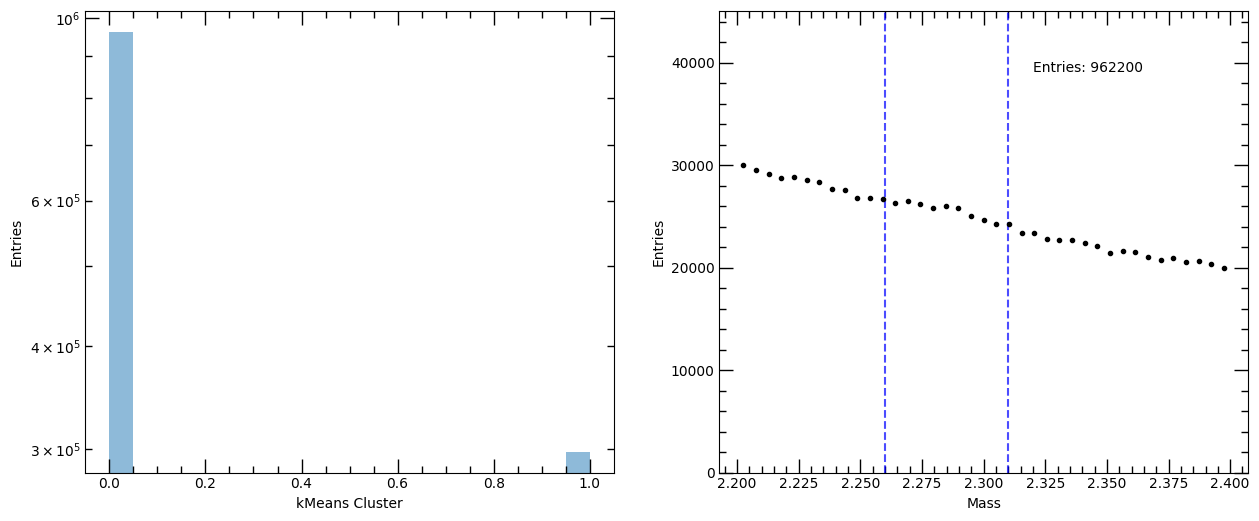

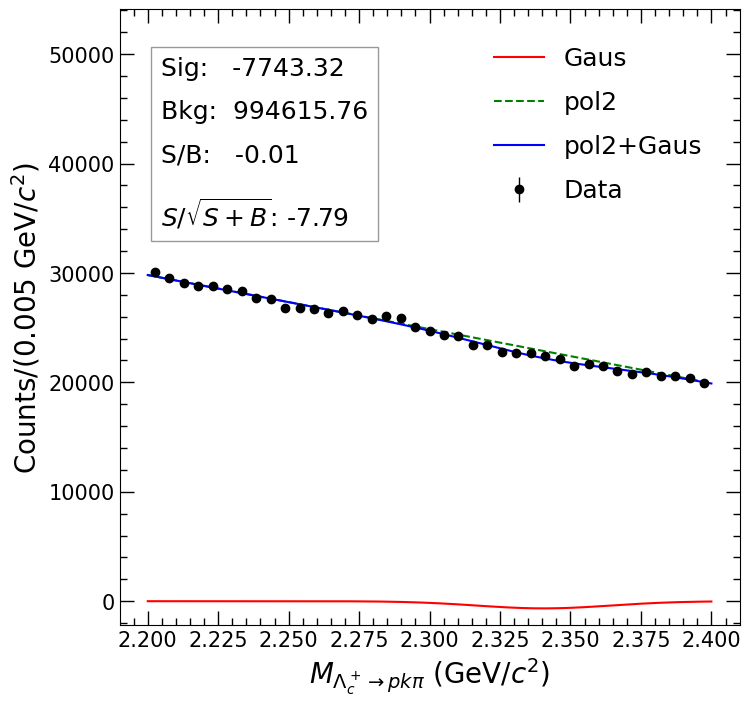

In [109]:
model='kMeans'

bigTicks=10
smallTicks=5

minMass=2.2
maxMass=2.4
binWidth=0.005 # GeV/c^2 ~ 4 MeV/c^2
binsInvMass=int((maxMass-minMass)/binWidth);


fig, ax = plt.subplots(1,2, figsize=(15,6))


cluster=0

ptMin=0
ptMax=10



scoreCut=f'cluster == {cluster:.2f} & fPt > {ptMin:.2f} & fPt < {ptMax:.2f}'
ax[0].hist(df_application['cluster'],bins=20,alpha=0.5,log=1)
ax[0].minorticks_on()
ax[0].tick_params('both', top=True, right=True, direction='in',length=bigTicks, width=1, which='major')
ax[0].tick_params('both', top=True, right=True, direction='in',length=smallTicks, width=1, which='minor')
#ax[0].axvline(scoreMin, 0, 1, label='pyplot vertical line',color='r',linestyle='--',alpha=0.7)
#ax[0].axvline(scoreMax, 0, 1, label='pyplot vertical line',color='r',linestyle='--',alpha=0.7)
ax[0].set_ylabel('Entries')
xLabel=f'{model} Cluster'
ax[0].set_xlabel(xLabel)


counts, bins = np.histogram(df_application.query(scoreCut)['fM'], bins=binsInvMass)
x_point = 0.5 * (bins[1:] + bins[:-1])
ax[1].errorbar(x_point, counts, yerr=np.sqrt(counts), fmt='.', ecolor='k', color='k', elinewidth=1., label='Data')
ax[1].set_ylim(bottom=0)
ax[1].set_ylim(top=counts.max()*1.5)
ax[1].minorticks_on()
#textStr= f'{model}: ({scoreMin:.2f}, {scoreMax:.2f})'
EntriesStr= f'Entries: {counts.sum()}'
#ax[1].text(2.32,counts.max()*1.2, textStr )
ax[1].text(2.32,counts.max()*1.3, EntriesStr )
ax[1].tick_params('both', top=True, right=True, direction='in',length=bigTicks, width=1, which='major')
ax[1].tick_params('both', top=True, right=True, direction='in',length=smallTicks, width=1, which='minor')
ax[1].set_ylabel('Entries')
ax[1].set_xlabel('Mass')
ax[1].axvline(2.26, 0, 1, label='pyplot vertical line',color='b',linestyle='--',alpha=0.7)
ax[1].axvline(2.31, 0, 1, label='pyplot vertical line',color='b',linestyle='--',alpha=0.7)
fit_invmass(df_application.query(scoreCut)['fM'], fit_range=[2.2, 2.4])

Explained Variance Ratios: [0.16236331 0.104001  ]


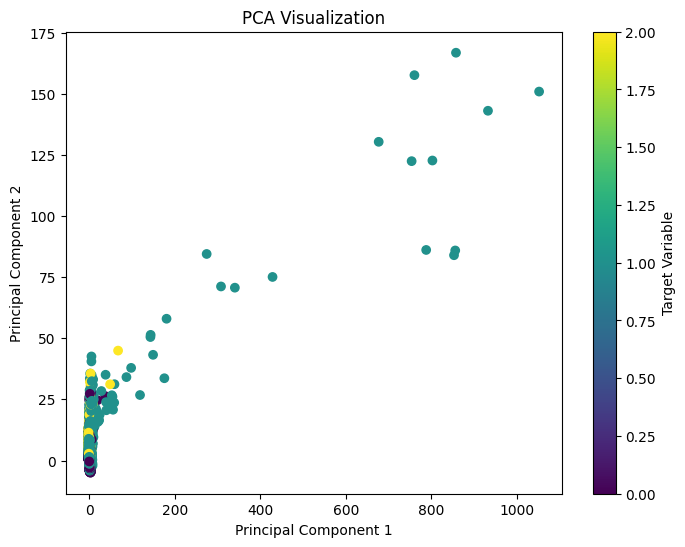